In [1]:
import sys
sys.path.append("../code")

import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

import mnist_reader 
X_train, y_train = mnist_reader.load_mnist('../data/mnist', kind='train')
X_test, y_test = mnist_reader.load_mnist('../data/mnist', kind='t10k')

X_train = X_train.astype(np.float32)
max_val = np.max(X_train)
X_train = X_train/max_val

np.random.seed(876)

i_ch = np.random.choice(len(X_train), size=10000, replace=False)
X_train_small = X_train[i_ch]
y_train_small = y_train[i_ch]

X_test = X_test/max_val

print(X_train.shape)

%matplotlib notebook

%load_ext autoreload
%autoreload 2

(60000, 784)


In [4]:
def scatterplot(y,label,s=0.1):
    plt.figure()
    return plt.scatter(y[:,0],y[:,1],c=label, cmap='Spectral', s=s)

<IPython.core.display.Javascript object>


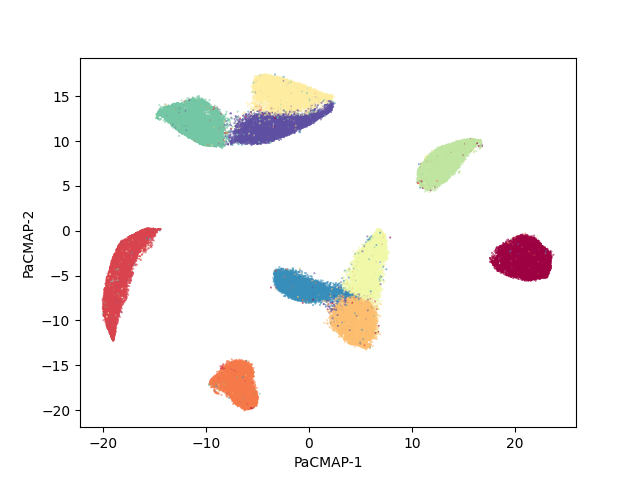

In [13]:
import pacmap

pac = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 

y_pac = pac.fit_transform(X_train, init="pca")

scatterplot(y_pac, y_train, s=0.1)

plt.xlabel('PaCMAP-1')
plt.ylabel('PaCMAP-2')

fig_folder = 'PaCMAP_Figs/'

plt.savefig(fig_folder + 'pacmap.png',dpi=400)

with open('pacmap_candle.npy', 'wb') as f:
    np.save(f, y_pac)

<h1>PacMAP Repulsion</h1>

<IPython.core.display.Javascript object>


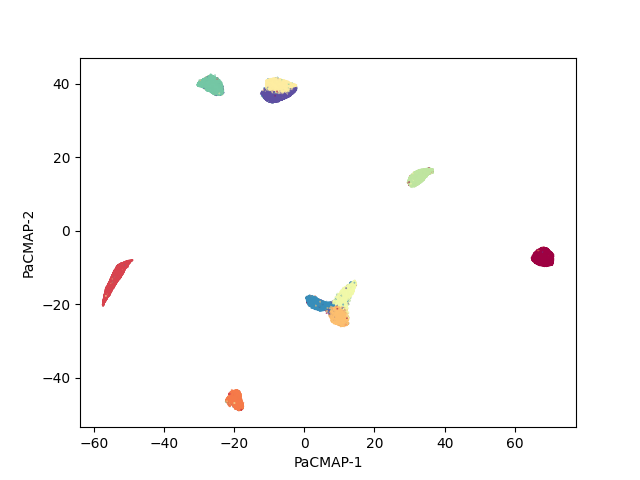

In [14]:
import pacmap_rep

pac = pacmap_rep.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 
#epsilon = 0.00005

y_pac = pac.fit_transform(X_train, init="pca")

scatterplot(y_pac, y_train, s=0.1)

plt.xlabel('PaCMAP-1')
plt.ylabel('PaCMAP-2')

plt.savefig(fig_folder + 'pacmap_rep.png',dpi=400)

with open('pacmap_repulsion.npy', 'wb') as f:
    np.save(f, y_pac)

<h1>pacmap random</h1>

In [9]:
N_seeds =100
np.random.seed(500)
seeds = np.random.randint(2**32 - 1,size=N_seeds)
seeds

array([2979330906,  321012663,  265072449, 2236522769, 2863075022,
        194792381, 2401784095, 4206019144,  365547335, 1875660287,
       1685427021,  904286957, 2134931729, 1569756561, 1426569429,
        647483177, 1470332450, 1249558698, 1570398226, 2981900947,
       3653409933,  165879910, 1926281832, 3846669239, 1359237039,
       3399521592, 1553632138,  237930030, 1935838093, 1271988333,
       3931046402,  343305531, 1975507069, 3153126588, 1175444333,
        262108906, 3940615822, 1151106364, 1973675851, 3658037182,
       2339001435, 3812679325, 2966492572, 2097525961, 3568422359,
       4124282491, 2731209689, 4145622882, 2790943474, 4020604431,
       4096360847, 1500385907, 2447935389, 4221984709, 2728169657,
       2632588709,  156604112, 3094163115, 3217474913, 1191165174,
       3685375841, 3332113859, 2084808646,  847775072,  997127188,
       4069351377, 2162035181, 1730015732,  584681988, 3911526522,
        743331273, 3574832700,  450792668, 2171459230, 1047931

In [11]:
import pacmap

pacs = []

for i in range(N_seeds):
    np.random.seed(seeds[i])
    y_init = np.random.randn(X_train.shape[0],2)
    pac = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 
    y_pac = pac.fit_transform(X_train, init=y_init)
    pacs.append(y_pac)
    print('Completed:', i, ' of ', N_seeds)
    
    
with open('pacmap_random.npy', 'wb') as f:
    np.save(f, pacs)

Completed: 0  of  100
Completed: 1  of  100
Completed: 2  of  100
Completed: 3  of  100
Completed: 4  of  100
Completed: 5  of  100
Completed: 6  of  100
Completed: 7  of  100
Completed: 8  of  100
Completed: 9  of  100
Completed: 10  of  100
Completed: 11  of  100
Completed: 12  of  100
Completed: 13  of  100
Completed: 14  of  100
Completed: 15  of  100
Completed: 16  of  100
Completed: 17  of  100
Completed: 18  of  100
Completed: 19  of  100
Completed: 20  of  100
Completed: 21  of  100
Completed: 22  of  100
Completed: 23  of  100
Completed: 24  of  100
Completed: 25  of  100
Completed: 26  of  100
Completed: 27  of  100
Completed: 28  of  100
Completed: 29  of  100
Completed: 30  of  100
Completed: 31  of  100
Completed: 32  of  100
Completed: 33  of  100
Completed: 34  of  100
Completed: 35  of  100
Completed: 36  of  100
Completed: 37  of  100
Completed: 38  of  100
Completed: 39  of  100
Completed: 40  of  100
Completed: 41  of  100
Completed: 42  of  100
Completed: 43  of  10

<h1>PacMap Modified</h1>

In [ ]:
import pacmap_atr1

pacs_mod = []

for i in range(N_seeds):
    np.random.seed(seeds[i])
    y_init = np.random.randn(X_train.shape[0],2)
    pac = pacmap_atr1.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 
    y_pac = pac.fit_transform(X_train, init=y_init)
    pacs_mod.append(y_pac)
    print('Completed:', i, ' of ', N_seeds)
    
    #scatterplot(y_pac, y_train, s=0.1)

with open('pacmap_modified_random_0.01.npy', 'wb') as f:
    np.save(f, pacs_mod)

<h1>LocalMAP</h1>

<IPython.core.display.Javascript object>


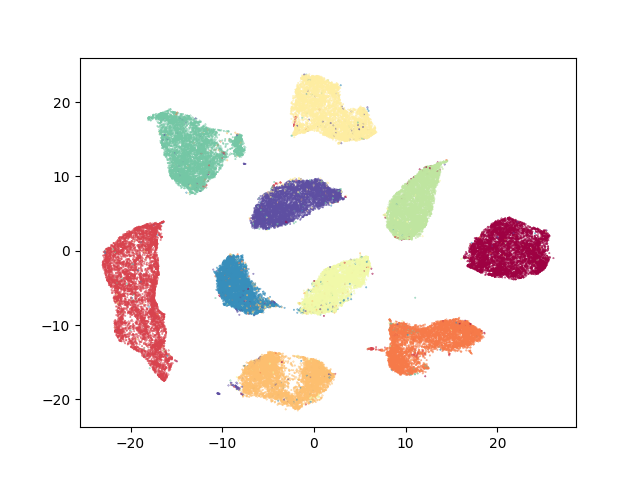

In [26]:
from pacmap_local import LocalMAP

loc = LocalMAP(n_components=2, n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0) 
y_loc = loc.fit_transform(X_train, init='pca')

scatterplot(y_loc, y_train, s=0.1)

with open('localmap_candle.npy','wb') as f:
    np.save(f,y_loc)

<IPython.core.display.Javascript object>


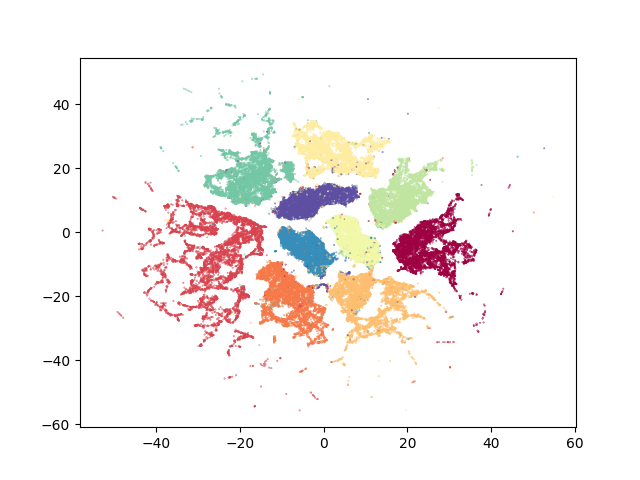

In [44]:
from pacmap_local import LocalMAP

loc = LocalMAP(n_components=2, n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0, low_dist_thres=7) 
y_loc = loc.fit_transform(X_train, init='pca')

scatterplot(y_loc, y_train, s=0.1)

with open('localmap_K_7.npy','wb') as f:
    np.save(f,y_loc)

<IPython.core.display.Javascript object>


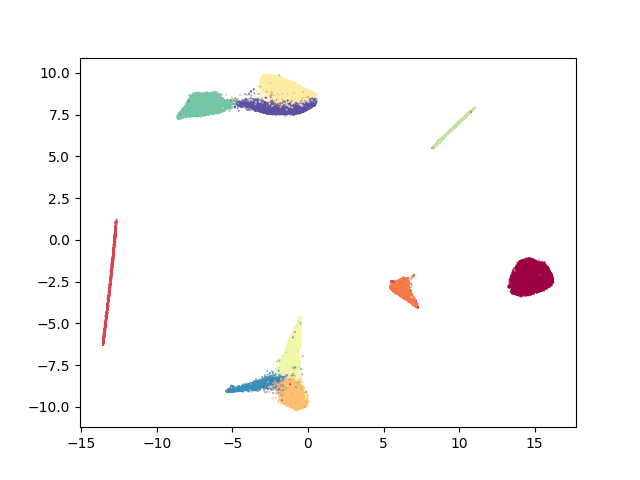

In [45]:
from pacmap_local import LocalMAP

loc = LocalMAP(n_components=2, n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0, low_dist_thres=20) 
y_loc = loc.fit_transform(X_train, init='pca')

scatterplot(y_loc, y_train, s=0.1)

with open('localmap_K_20.npy','wb') as f:
    np.save(f,y_loc)

<IPython.core.display.Javascript object>


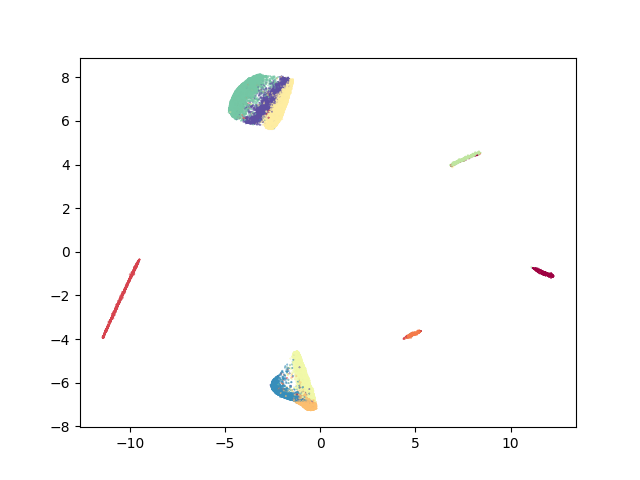

In [41]:
from pacmap_local import LocalMAP

loc = LocalMAP(n_components=2, n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0, low_dist_thres=50) 
y_loc = loc.fit_transform(X_train, init='pca')

scatterplot(y_loc, y_train, s=0.1)

#with open('localmap_candle.npy','wb') as f:
#    np.save(f,y_loc)

<IPython.core.display.Javascript object>


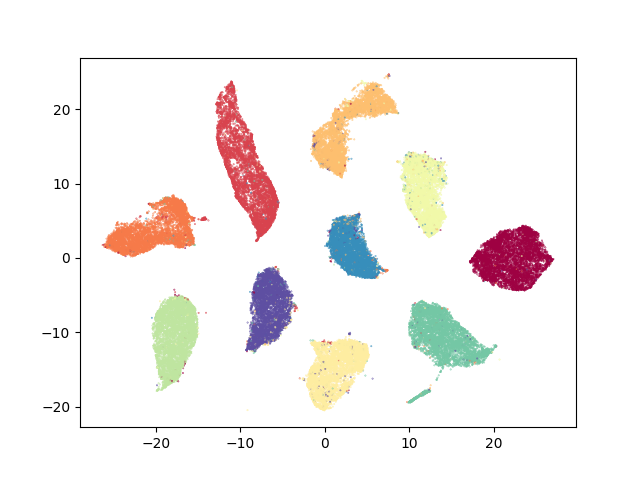

In [47]:
from pacmap_local import LocalMAP

loc = LocalMAP(n_components=2, n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0) 
y_loc = loc.fit_transform(X_train, init='random')

scatterplot(y_loc, y_train, s=0.1)

with open('localmap_random.npy','wb') as f:
    np.save(f,y_loc)